## Coordinates

The Coordinates layers offer specific and very useful tools for efficiently and accurately communicating data. Here we’ll look at the various ways of effectively using these layers, so you can clearly visualize lognormal datasets, variables with units, and periodic data.

### Zooming In
In the video, you saw different ways of using the coordinates layer to zoom in. In this exercise, we'll compare zooming by changing scales and by changing coordinates.

The big difference is that the scale functions change the underlying dataset, which affects calculations made by computed geoms (like histograms or smooth trend lines), whereas coordinate functions make no changes to the dataset.

A scatter plot using mtcars with a LOESS smoothed trend line is provided. Take a look at this before updating it.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 12 rows containing non-finite values (stat_smooth)."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  4e-006"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 3.168"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.002"Warning message in simpleLoess(y, x, w, span, degree =

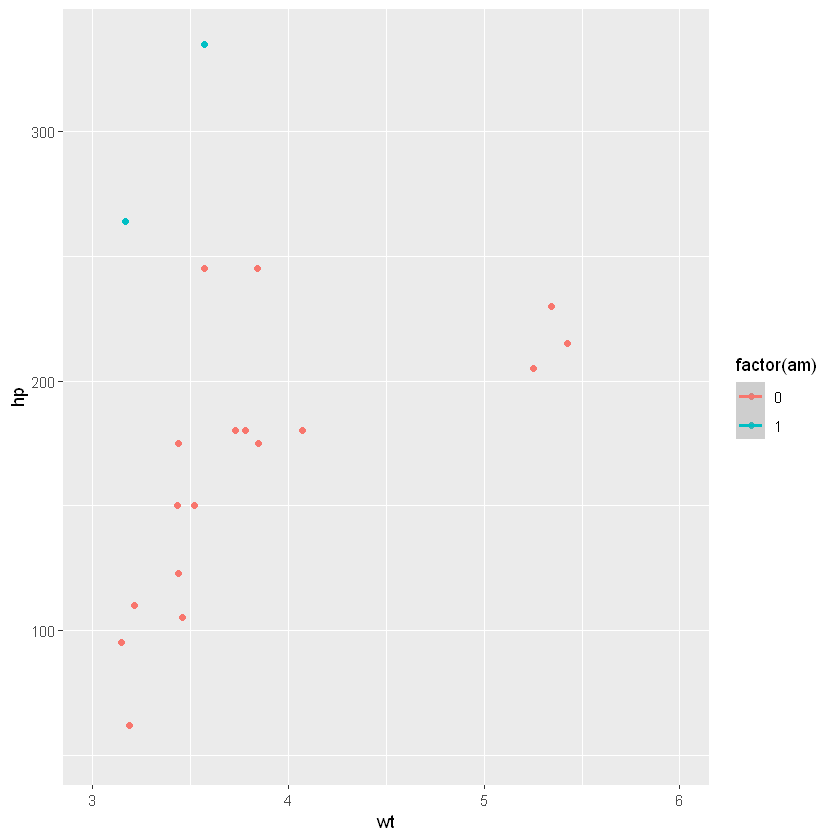

In [5]:
library(ggplot2)
# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = wt, y = hp, color = factor(am))) +
  geom_point() +
  geom_smooth() +
  # Add a continuous x scale from 3 to 6
  scale_x_continuous(limits = c(3,6))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


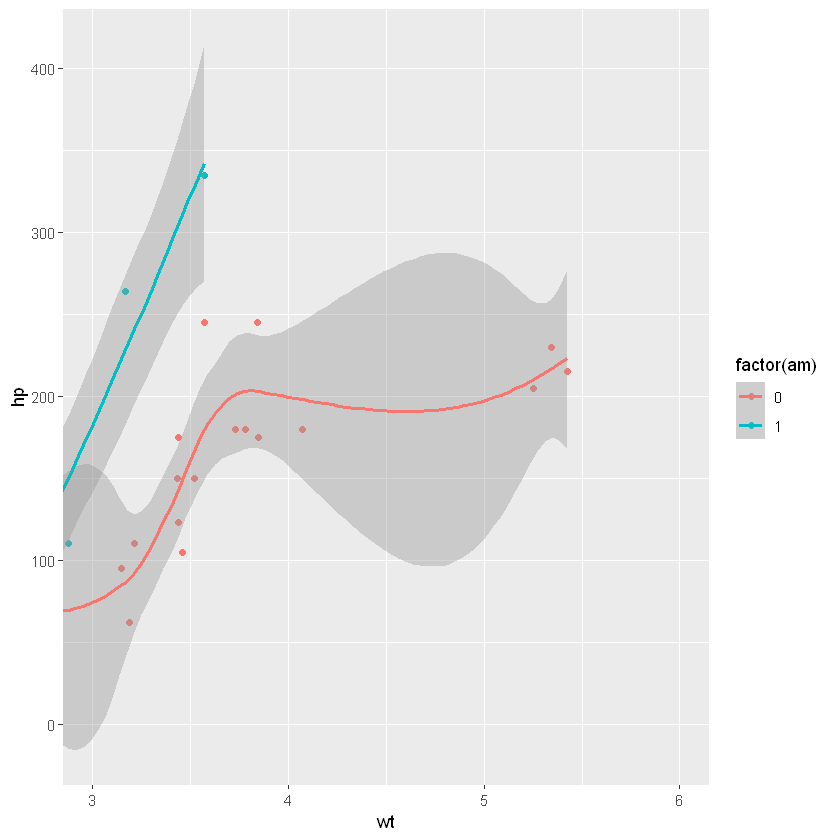

In [6]:
ggplot(mtcars, aes(x = wt, y = hp, color = factor(am))) +
  geom_point() +
  geom_smooth() +
  # Add Cartesian coordinates with x limits from 3 to 6
  coord_cartesian(xlim = c(3,6))

### Aspect ratio I: 1:1 ratios
We can set the aspect ratio of a plot with coord_fixed(), which uses ratio = 1 as a default. A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the iris dataset.

All variables are measured in centimeters, so it only makes sense that one unit on the plot should be the same physical distance on each axis. This gives a more truthful depiction of the relationship between the two variables since the aspect ratio can change the angle of our smoothing line. This would give an erroneous impression of the data. Of course the underlying linear models don't change, but our perception can be influenced by the angle drawn.

A plot using the iris dataset, of sepal width vs. sepal length colored by species, is shown in the viewer.

`geom_smooth()` using formula 'y ~ x'


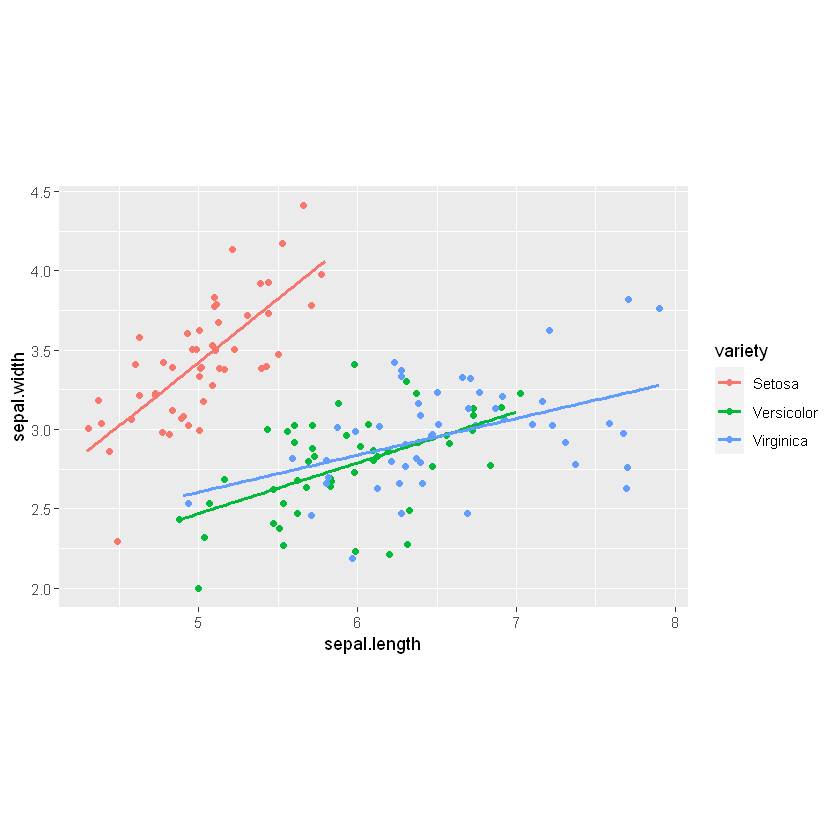

In [8]:
# read data 
iris = read.csv('iris.csv')

# plot 
ggplot(iris, aes(x = sepal.length, y = sepal.width, color = variety)) +
  geom_jitter() +
  geom_smooth(method = "lm", se = FALSE) +
  # Fix the coordinate ratio
  coord_fixed()


### Expand and clip
The coord_*() layer functions offer two useful arguments that work well together: expand and clip.

expand sets a buffer margin around the plot, so data and axes don't overlap. Setting expand to 0 draws the axes to the limits of the data.
clip decides whether plot elements that would lie outside the plot panel are displayed or ignored ("clipped").
When done properly this can make a great visual effect! We'll use theme_classic() and modify the axis lines in this example.

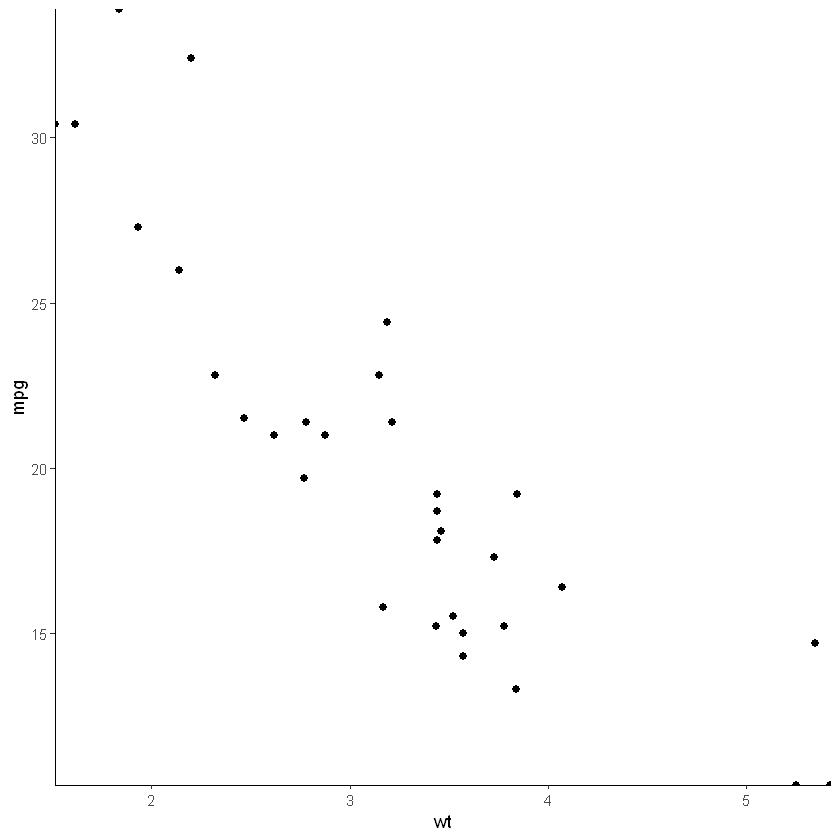

In [9]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Add Cartesian coordinates with zero expansion
  coord_cartesian(expand = 0) + theme_classic()

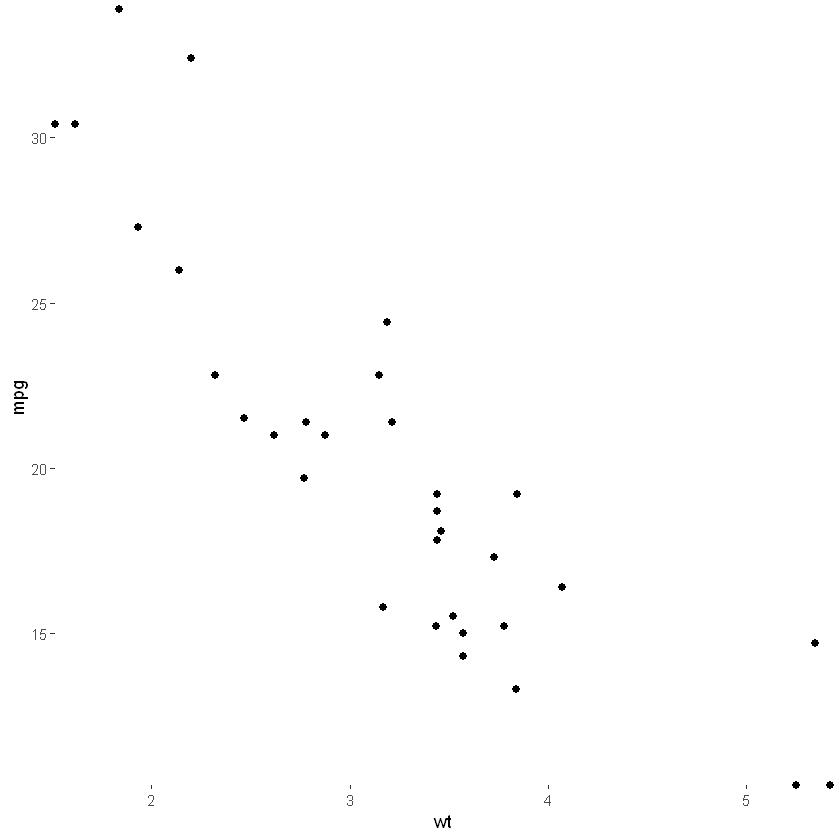

In [10]:
# Setting expand to 0 caused points at the edge of the plot panel to be cut off.

ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Turn clipping off
  coord_cartesian(expand = 0, clip = "off") + theme_classic() +
  # Remove axis lines
  theme(axis.line = element_blank())

### Log-transforming scales
Using scale_y_log10() and scale_x_log10() is equivalent to transforming our actual dataset before getting to ggplot2.

Using coord_trans(), setting x = "log10" and/or y = "log10" arguments, transforms the data after statistics have been calculated. The plot will look the same as with using scale_*_log10(), but the scales will be different, meaning that we'll see the original values on our log10 transformed axes. This can be useful since log scales can be somewhat unintuitive.

Let's see this in action with positively skewed data - the brain and body weight of 51 mammals from the msleep dataset.

Warning message:
"Removed 27 rows containing missing values (geom_point)."

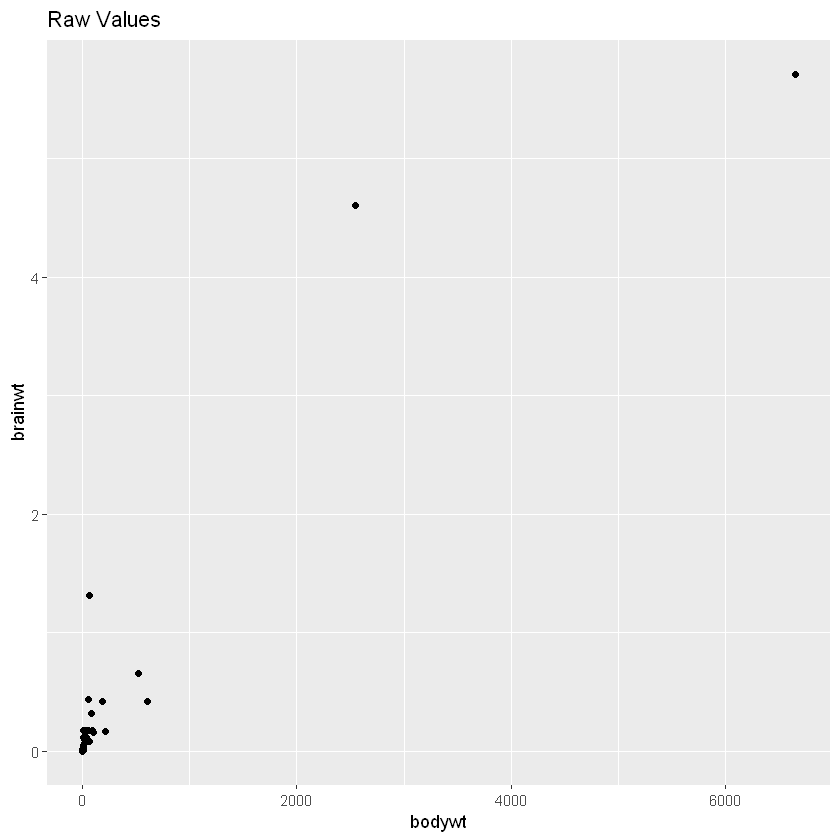

In [11]:
# Produce a scatter plot of brainwt vs. bodywt
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  ggtitle("Raw Values")

Warning message:
"Removed 27 rows containing missing values (geom_point)."

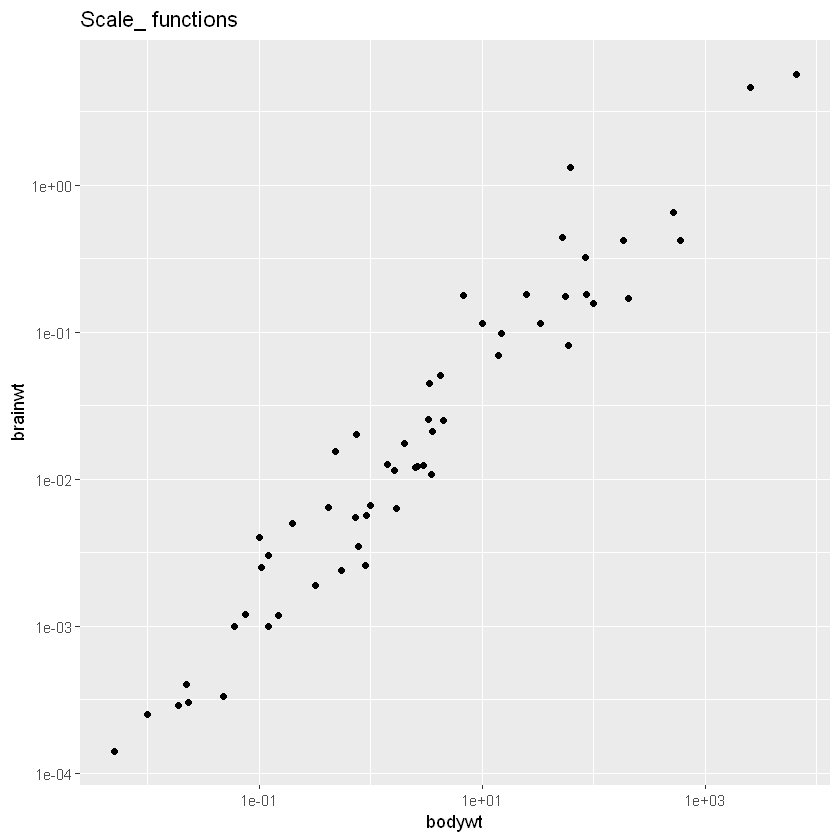

In [12]:
# Add scale_*_*() functions
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_y_log10() +
  scale_x_log10()+
  ggtitle("Scale_ functions")

Warning message:
"Removed 27 rows containing missing values (geom_point)."

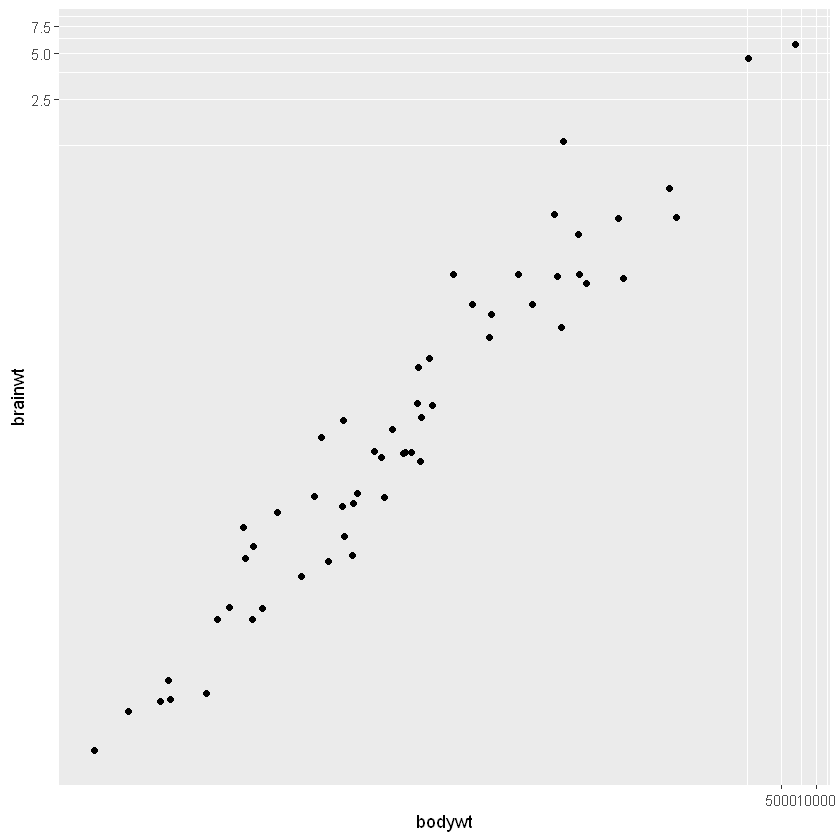

In [13]:
# Perform a log10 coordinate system transformation
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  coord_trans(x = "log10", y = 'log10')

### Adding stats to transformed scales
In the last exercise, we saw the usefulness of the coord_trans() function, but be careful! Remember that statistics are calculated on the untransformed data. A linear model may end up looking not-so-linear after an axis transformation. Let's revisit the two plots from the previous exercise and compare their linear models.

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 27 rows containing missing values (geom_point)."

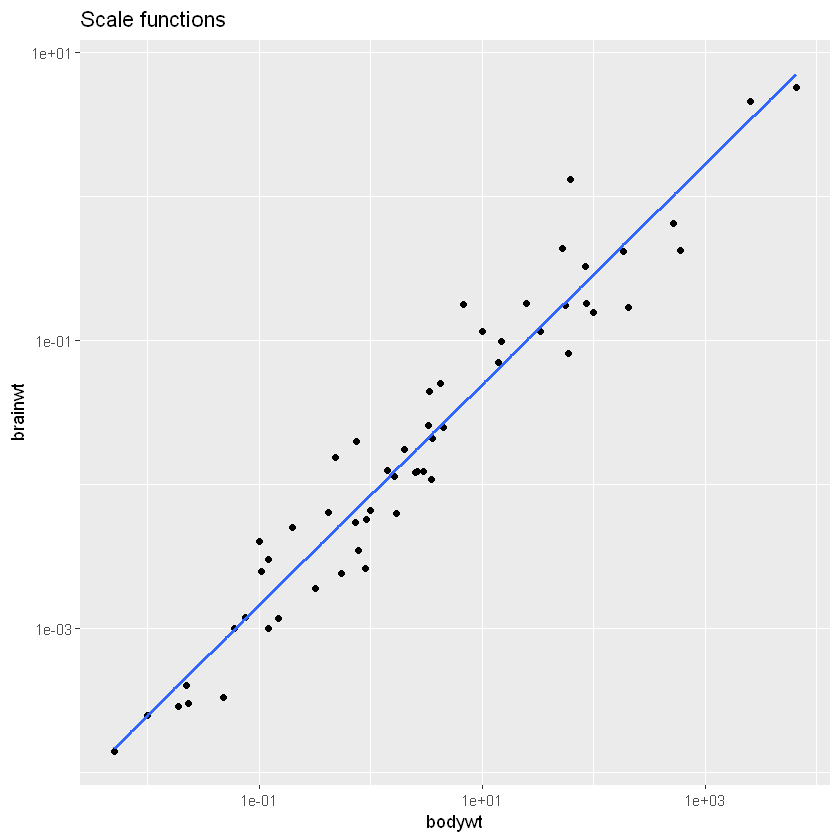

In [15]:
# Plot with a scale_*_*() function:
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 x scale
  scale_x_log10() +
 
  # Add a log10 y scale
   scale_y_log10()+
  ggtitle("Scale functions")

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 27 rows containing missing values (geom_point)."

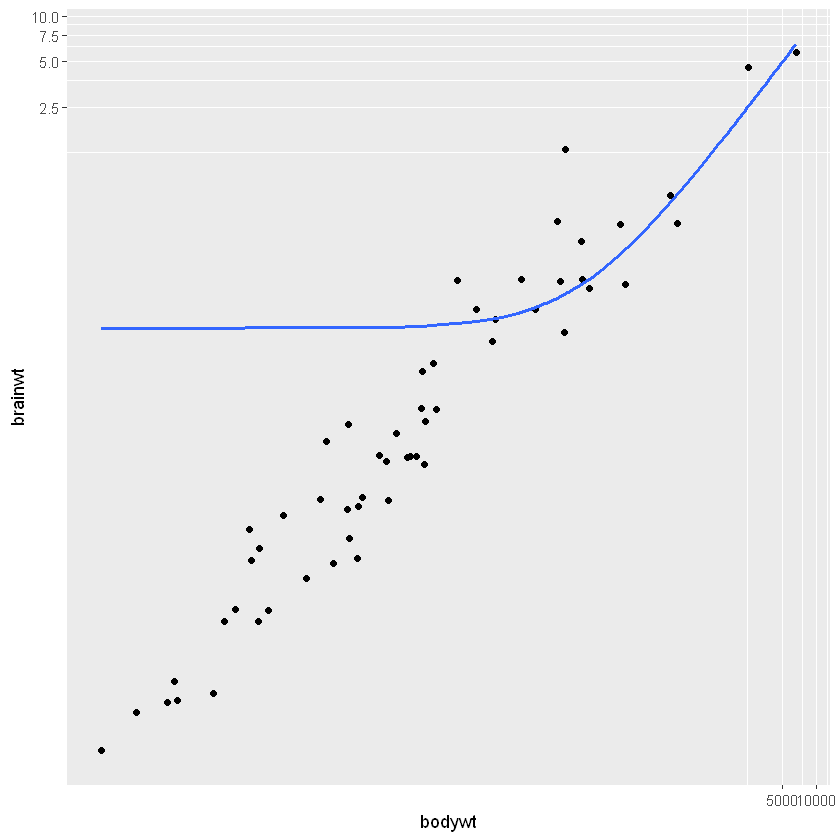

In [16]:
# Add a log10 coordinate transformation for both the x and y axes.
# Do you notice the difference between the two plots?

# Plot with transformed coordinates
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 coordinate transformation for x and y axes
    coord_trans(x = "log10", y = 'log10')

# The smooth trend line is calculated after scale transformations but not coordinate transformations, 
# so the second plot doesn't make sense. Be careful when using the coord_trans() function!

### Useful double axes
Double x and y-axes are a contentious topic in data visualization. We'll revisit that discussion at the end of chapter 4. Here, I want to review a great use case where double axes actually do add value to a plot.

Our goal plot is displayed in the viewer. The two axes are the raw temperature values on a Fahrenheit scale and the transformed values on a Celsius scale.

You can imagine a similar scenario for Log-transformed and original values, miles and kilometers, or pounds and kilograms. A scale that is unintuitive for many people can be made easier by adding a transformation as a double axis.

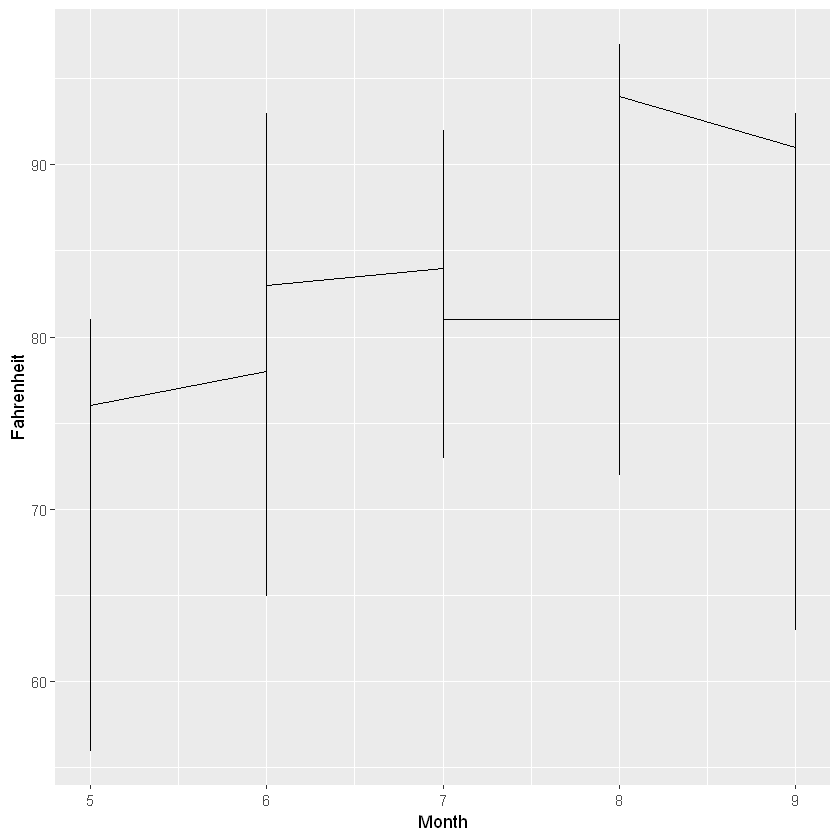

In [23]:
# Using airquality, plot Temp vs. Date
ggplot(airquality, aes(Month, Temp)) +
  # Add a line layer
  geom_line() +
  labs(x = "Month", y = "Fahrenheit")

<ggproto object: Class AxisSecondary, gg>
    axis: NULL
    break_info: function
    breaks: 60 70 80 90 100
    create_scale: function
    detail: 1000
    empty: function
    guide: waiver
    init: function
    labels: 4.375 5.9375 7.5 9.0625 10.625
    make_title: function
    mono_test: function
    name: Celsius
    trans: function
    transform_range: function
    super:  <ggproto object: Class AxisSecondary, gg>

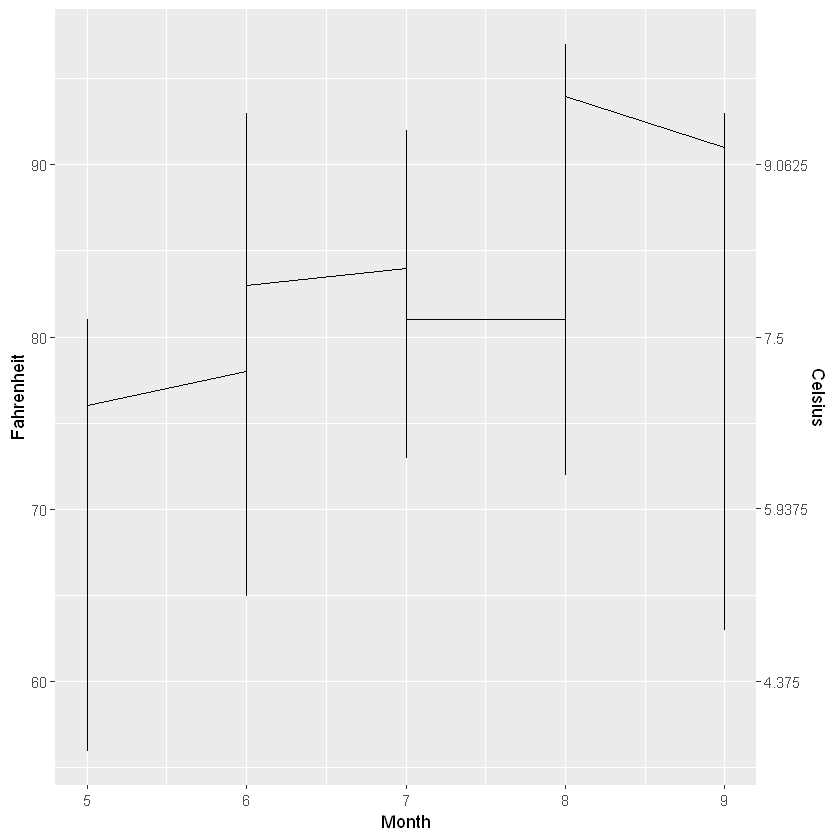

In [28]:
# define the second axis 
# Define breaks (Fahrenheit)
y_breaks <- c(60, 70, 80, 90, 100)

# Convert y_breaks from Fahrenheit to Celsius
y_labels <- ((y_breaks - 32)*5)/ 32

# Create a secondary x-axis
secondary_y_axis <- sec_axis(
  # Use identity transformation
  trans = identity, 
  name = "Celsius",
  # Define breaks and labels as above
  breaks = y_breaks,
  labels = y_labels
)

# Examine the object
secondary_y_axis

# Update the plot
ggplot(airquality, aes(Month, Temp)) +
  geom_line() +
  # Add the secondary y-axis 
  scale_y_continuous(sec.axis = secondary_y_axis) +
  labs(x = "Month", y = "Fahrenheit")

### Flipping axes I
Flipping axes means to reverse the variables mapped onto the x and y aesthetics. We can just change the mappings in aes(), but we can also use the coord_flip() layer function.

There are two reasons to use this function:

We want a vertical geom to be horizontal, or
We've completed a long series of plotting functions and want to flip it without having to rewrite all our commands.

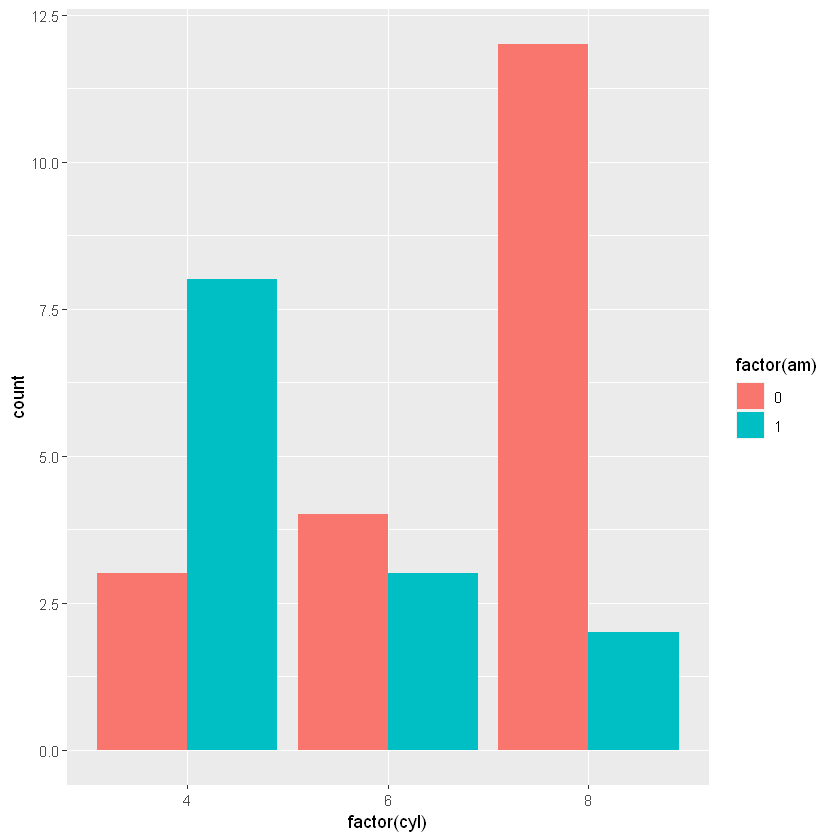

In [30]:
# Plot fcyl bars, filled by fam
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Place bars side by side
  geom_bar(position = "dodge")

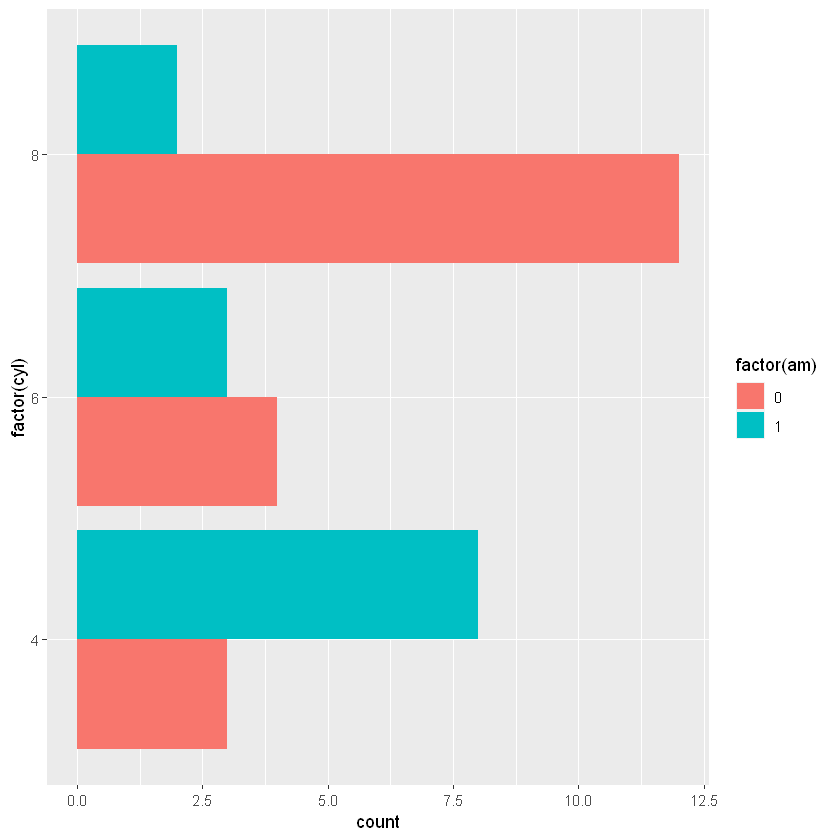

In [33]:
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Place bars side by side
  geom_bar(position = "dodge") +
  # Flip the x and y coordinates
  coord_flip()

### Flipping axes II
In this exercise, we'll continue to use the coord_flip() layer function to reverse the variables mapped onto the x and y aesthetics.

Within the mtcars dataset, car is the name of the car and wt is its weight.

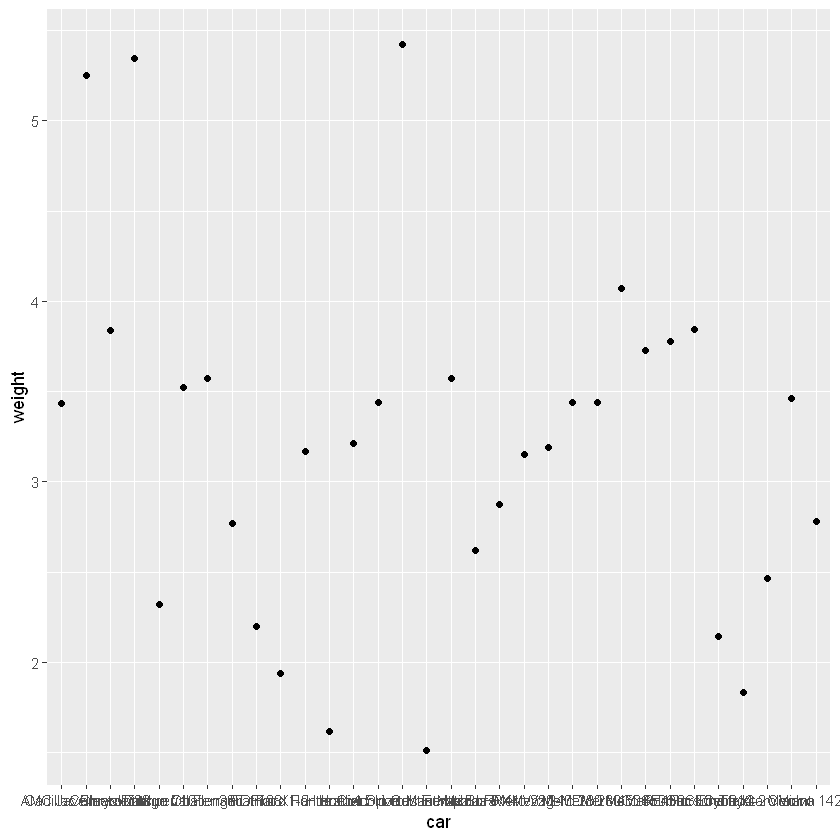

In [52]:
# Plot of wt vs. car
ggplot(mtcars, aes(rownames(mtcars), wt)) +
  # Add a point layer
  geom_point() +
  labs(x = "car", y = "weight")

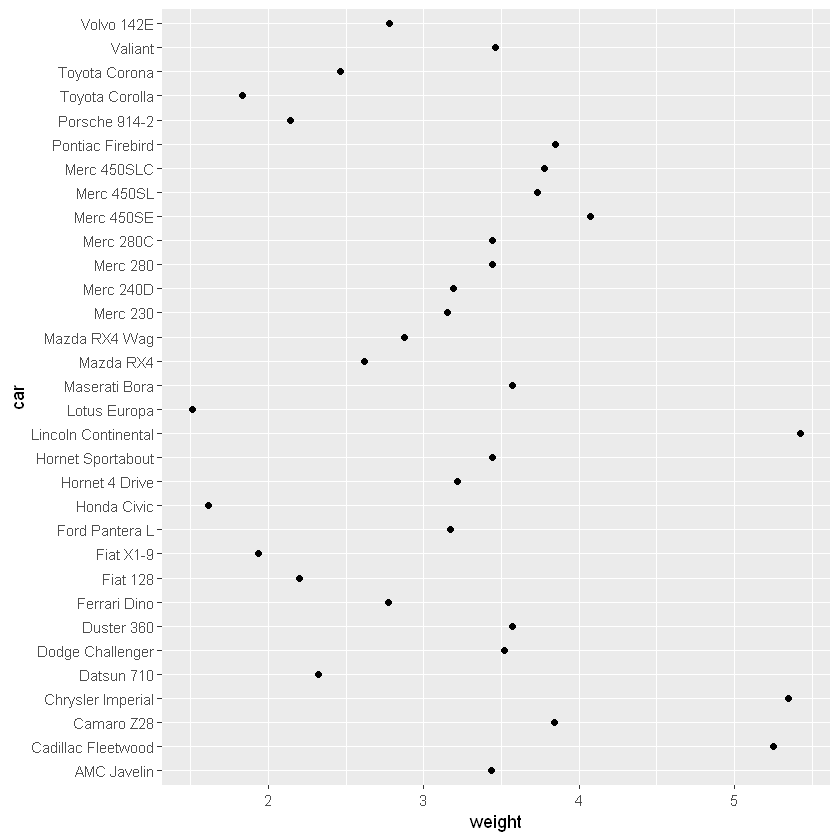

In [53]:
# Flip the axes to set car to the y axis
ggplot(mtcars, aes(rownames(mtcars), wt)) +
  geom_point() +
  labs(x = "car", y = "weight") +
  coord_flip()

### Pie charts
The coord_polar() function converts a planar x-y Cartesian plot to polar coordinates. This can be useful if you are producing pie charts.

We can imagine two forms for pie charts - the typical filled circle, or a colored ring.

Typical pie charts omit all of the non-data ink, which we saw in the themes chapter of the last course. Pie charts are not really better than stacked bar charts, but we'll come back to this point in the next chapter.

A bar plot using mtcars of the number of cylinders (as a factor), fcyl, is shown in the plot viewer.

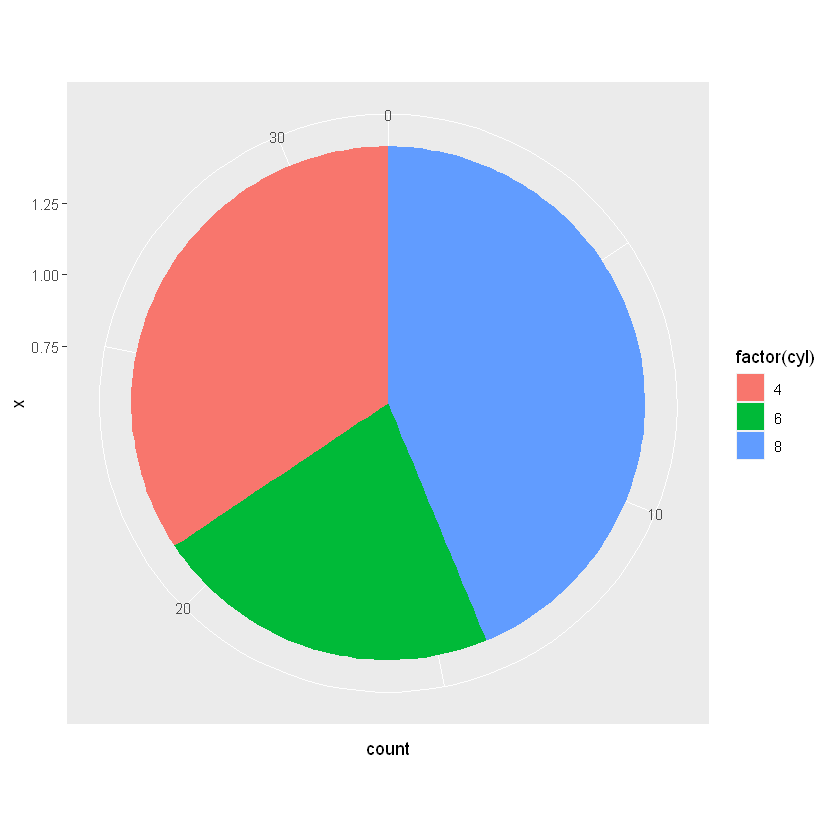

In [36]:
# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = 1, fill = factor(cyl))) +
  geom_bar() +
  # Add a polar coordinate system
coord_polar(theta = "y")

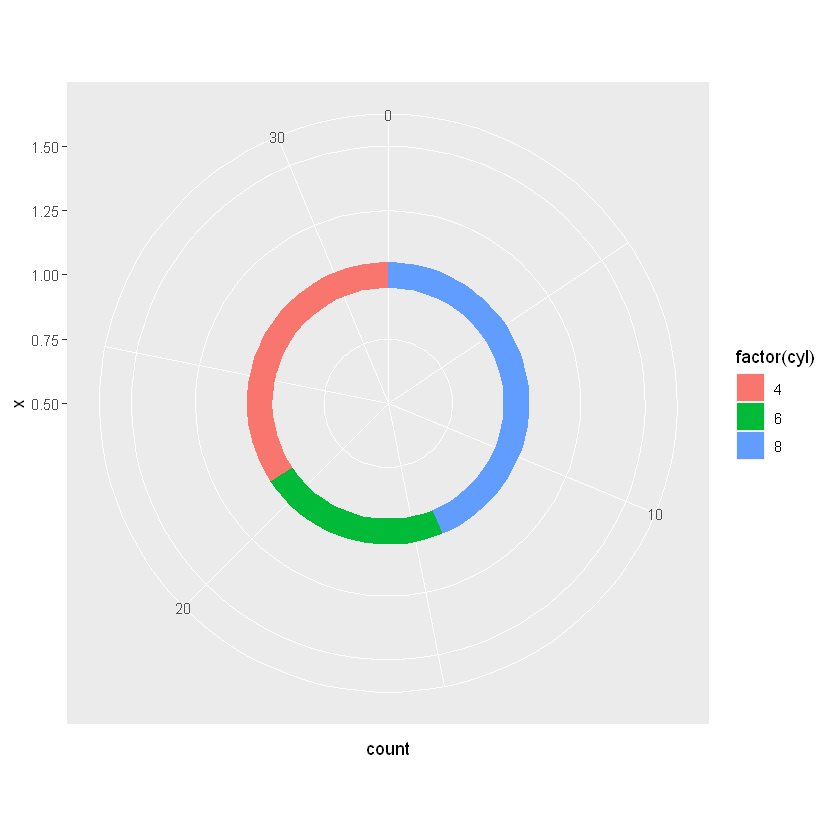

In [38]:
ggplot(mtcars, aes(x = 1, fill = factor(cyl))) +
  # Reduce the bar width to 0.1
  geom_bar(width = 0.1) +
  coord_polar(theta = "y") +
  # Add a continuous x scale from 0.5 to 1.5
   scale_x_continuous(limits= c(0.5,1.5))

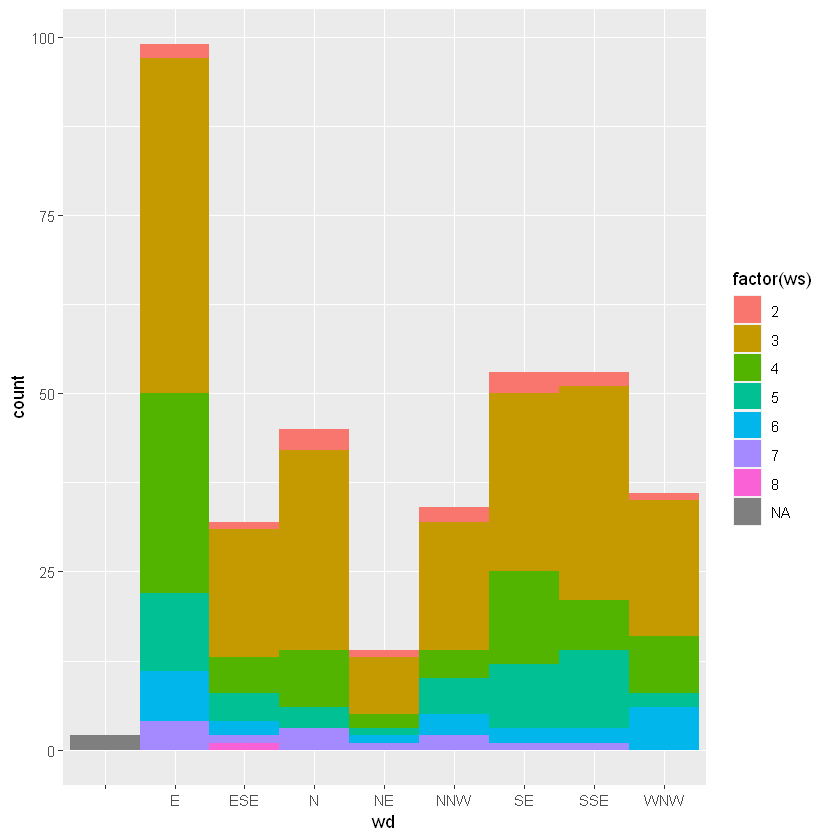

In [49]:
# read data 
wind = read.csv('Wind_Data.csv')

# Using wind, plot wd filled by ws
ggplot(wind, aes(wd, fill = factor(ws))) +
  # Add a bar layer with width 1
  geom_bar(width = 1)

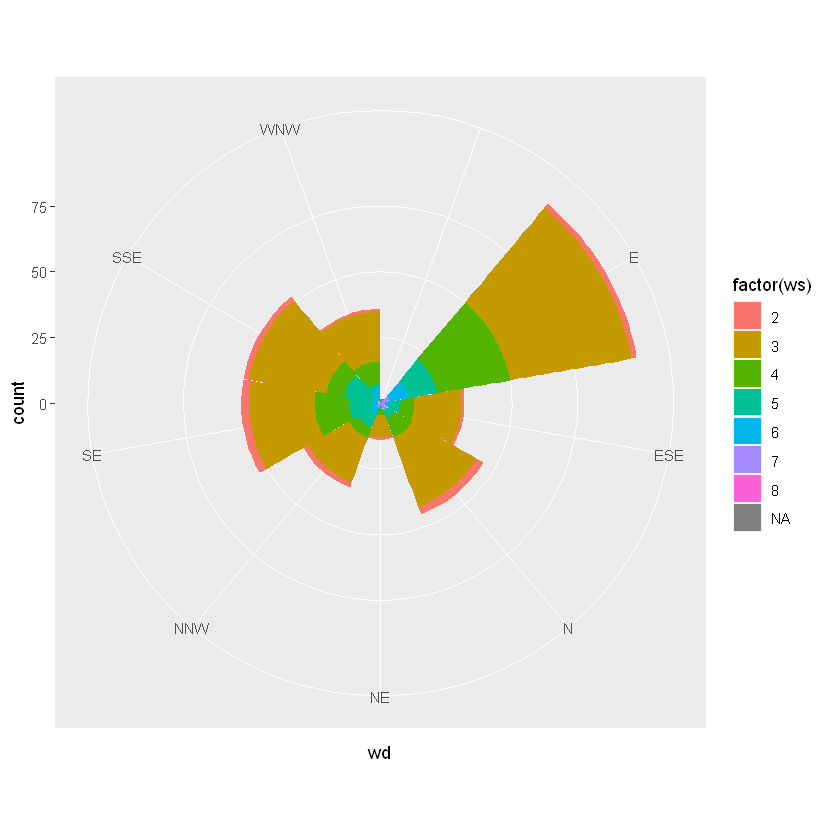

In [51]:
# Convert to polar coordinates:
ggplot(wind, aes(wd, fill =factor(ws))) +
  geom_bar(width = 1) +
  coord_polar()